# Data exploration of gold and oil stocks from 2012-2019

In [1]:
# Import nessesery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
#import the oil and gold
df_oil = pd.read_excel("oil_price.xlsx")
df_gold = pd.read_excel("gold_stocks_price.xlsx")

In [57]:
#definitions that are used later

#convert Volume to a float
def convertVol(X):
    new = []
    if X == "-":
        return None
    for i in X:
        if i.isalpha() == False:
            new.append(i)
    return round(float("".join(new))*1000)
#generate multiple histograms = to the length of the columns        
def generateHist(df, bins):
    
    for col in df:
        if col !=  "Date":
            sns.distplot(df[col],bins)
            plt.show()
#generate multiple box plots = to the length of the columns
def generateBox(df):
    for col in df:
        if col != "Date":
            sns.boxplot(df[col])
            plt.show()

# generates the candleStick graph's using a given dataset
# Must use Close and Open 
def candleStick(df,fixDates = False):
    df['indices'] = range(len(df))
    
    width  = 0.5   # width of real body
    width2 = 0.05  # width of shadow
    fig, ax = plt.subplots(figsize=(15,10))# find the rows that are bullish
    dfup = df[df.Close >= df.Open]# find the rows that are bearish
    dfdown = df[df.Close < df.Open]# find the bullish rows 
    #plot the bullish values
    ax.bar(dfup["indices"], dfup.Close - dfup.Open, width, 
           bottom = dfup.Open, edgecolor='g', color='green')
    ax.bar(dfup["indices"], dfup.High - dfup.Close, width2, 
           bottom = dfup.Close, edgecolor='g', color='green')
    ax.bar(dfup["indices"], dfup.Low - dfup.Open, width2, 
           bottom = dfup.Open, edgecolor='g', color='green')
    # plot the bearish candle stick
    ax.bar(dfdown["indices"], dfdown.Close - dfdown.Open, width, 
           bottom = dfdown.Open, edgecolor='r', color='red')
    ax.bar(dfdown["indices"], dfdown.High - dfdown.Open, width2, 
           bottom = dfdown.Open, edgecolor='r', color='red')
    ax.bar(dfdown["indices"], dfdown.Low - dfdown.Close, width2, 
           bottom = dfdown.Close, edgecolor='r', color='red')
    ax.grid(color='gray')
    # Is used to convert the date so it only contains mon-friday and ignore's saturday and sundays with no gaps
    if fixDates == True:
        ax.set_xticks(df[::5]['indices'])
        _ = ax.set_xticklabels(labels = 
            df[::5].Date.dt.strftime('%Y-%b-%d'), 
            rotation=45, ha='right')
    
def identifyOutliers(df,column):
    
    arr1 = df[column]
    # finding the 1st quartile
    q1 = np.quantile(arr1, 0.25)

    # finding the 3rd quartile
    q3 = np.quantile(arr1, 0.75)
    med = np.median(arr1)

    # finding the iqr region
    iqr = q3-q1

    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    
    outliers = df[(df[column] <= lower_bound) | (df[column]>= upper_bound)]
    print('The following are the outliers in the boxplot: \n {} '.format(outliers))
    
def identifyOutlierGraph(df,column):
    
    arr1 = df[column]
    # finding the 1st quartile
    q1 = np.quantile(arr1, 0.25)

    # finding the 3rd quartile
    q3 = np.quantile(arr1, 0.75)
    med = np.median(arr1)

    # finding the iqr region
    iqr = q3-q1

    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    
    df["outliers"] = np.where((df[column] <= lower_bound) | (df[column]>= upper_bound),True,False)
    
    plt.figure(figsize=(15, 6))
    ax = sns.lineplot(data=df, x='Date', y=column, color='black')
    sns.scatterplot(data=df, x='Date', y=column, s=50, alpha=0.2, hue="outliers", ax=ax)
    sns.despine()
    plt.show()
    
def identifyDatesGraph(df,start_date,end_date,column):
    
    df["outliers"] = np.where((df["Date"] <= start_date) | (df["Date"]>= end_date),True,False)
    
    plt.figure(figsize=(15, 6))
    ax = sns.lineplot(data=df, x='Date', y=column, color='black')
    sns.scatterplot(data=df, x='Date', y=column, s=50, alpha=0.2, hue="outliers", ax=ax)
    sns.despine()
    plt.show()

# Check the data types of the various columns

In [4]:
#Check the data types of columns from the dataframe
#Vol need's to be changed to a float/int assuming volume is important
df_oil.dtypes

Date     datetime64[ns]
Price           float64
Open            float64
High            float64
Low             float64
Vol.             object
dtype: object

In [5]:
df_gold.dtypes

Date             datetime64[ns]
Open                    float64
High                    float64
Low                     float64
Close                   float64
                      ...      
USO_High                float64
USO_Low                 float64
USO_Close               float64
USO_Adj Close           float64
USO_Volume                int64
Length: 81, dtype: object

In [6]:
df_oil["Vol."] = df_oil["Vol."].apply(lambda x: convertVol(x))

In [7]:
df_oil.dtypes

Date     datetime64[ns]
Price           float64
Open            float64
High            float64
Low             float64
Vol.            float64
dtype: object

In [8]:
df_oil.describe()

,Price,Open,High,Low,Vol.
count,1844.000000,1844.000000,1844.000000,1844.000000,1782.000000
mean,70.443980,70.481242,71.319707,69.552413,387139.590348
std,23.501399,23.485367,23.505822,23.424742,222483.739374
min,26.210000,27.300000,27.480000,26.050000,1010.000000
25%,49.062500,49.077500,49.710000,48.240000,224465.000000
50%,65.380000,65.295000,66.020000,64.315000,322470.000000
75%,94.602500,94.530000,95.592500,93.652500,552467.500000
max,110.530000,110.280000,112.240000,109.110000,987720.000000


In [9]:
df_gold.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962505,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635000,16.039999,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [10]:
df_gold.dtypes

Date             datetime64[ns]
Open                    float64
High                    float64
Low                     float64
Close                   float64
                      ...      
USO_High                float64
USO_Low                 float64
USO_Close               float64
USO_Adj Close           float64
USO_Volume                int64
Length: 81, dtype: object

# Handle NaN values

In [11]:
df_oil.isna().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Vol.     62
dtype: int64

In [12]:
df_gold.isna().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [13]:
df_oil = df_oil.fillna(method ="backfill",limit =2)

In [14]:
df_oil.isna().sum()

Date     0
Price    0
Open     0
High     0
Low      0
Vol.     0
dtype: int64

In [15]:
df_oil = df_oil.rename(columns = {"Price":"Close","Vol.":"Volume"})

In [16]:
df_gold = df_gold[["Date","Close","Open","High","Low","Volume"]]

# Generate Histogram plots

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


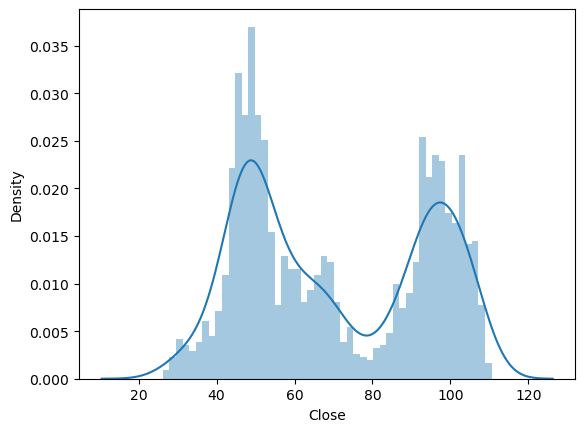

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


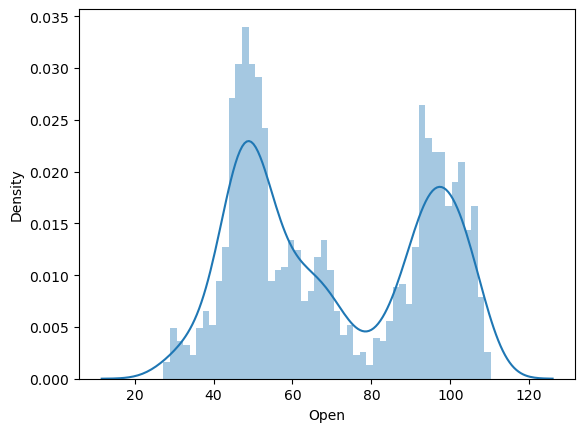

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


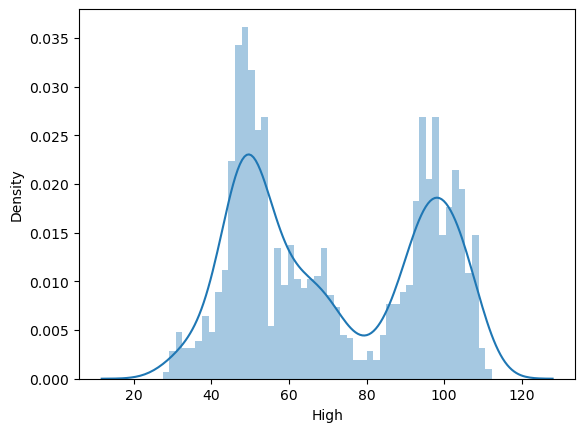

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


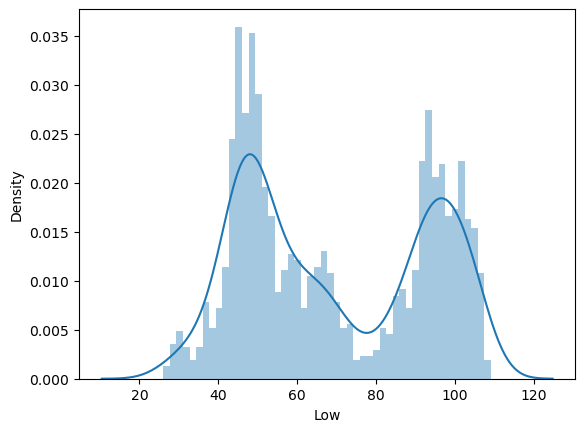

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


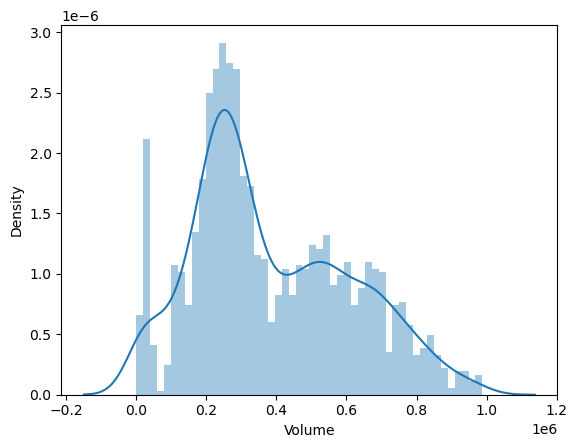

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


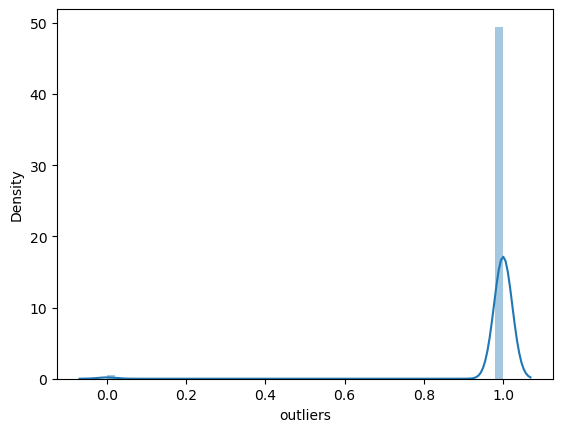

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


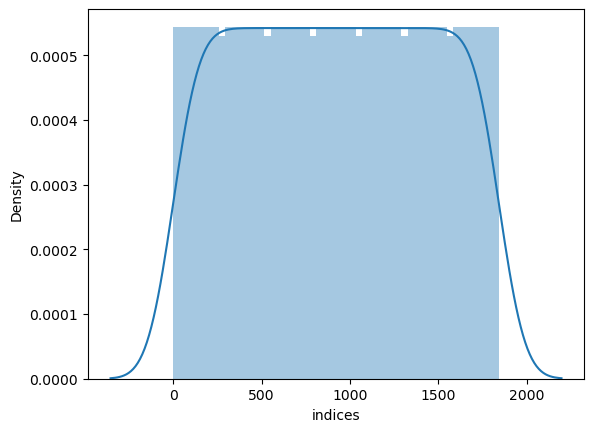

In [62]:
generateHist(df_oil,50)

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


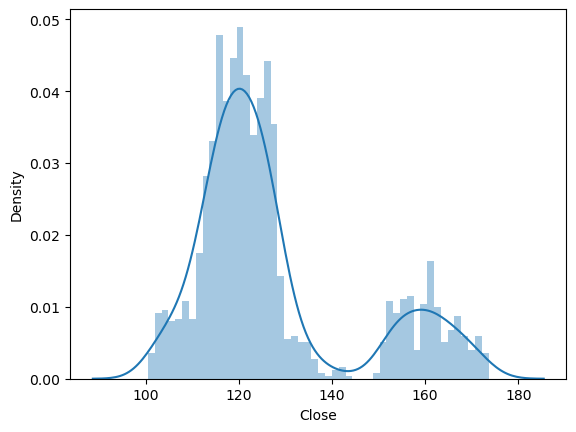

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


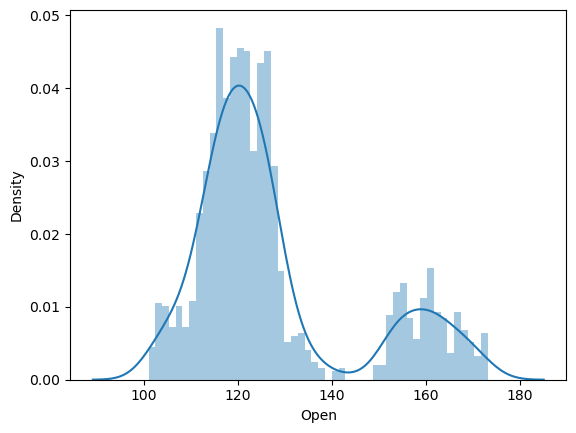

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


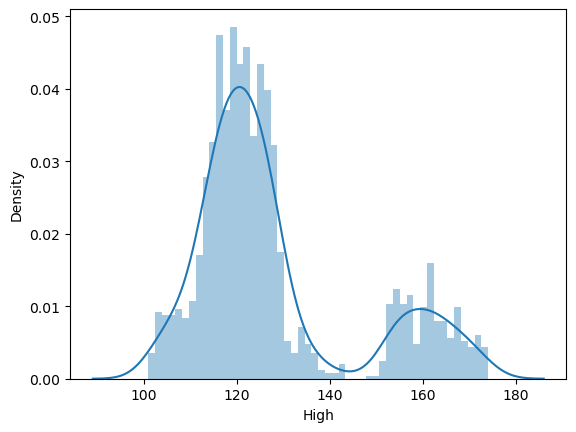

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


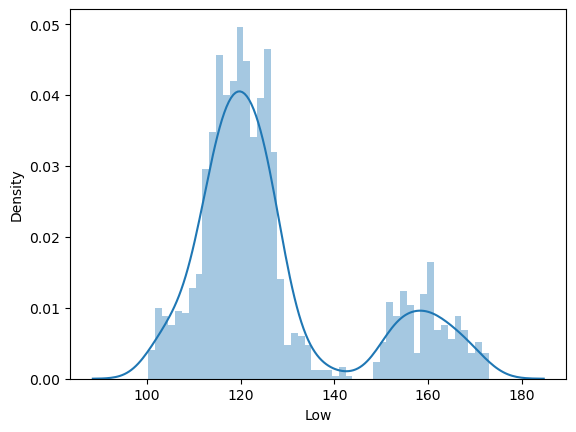

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


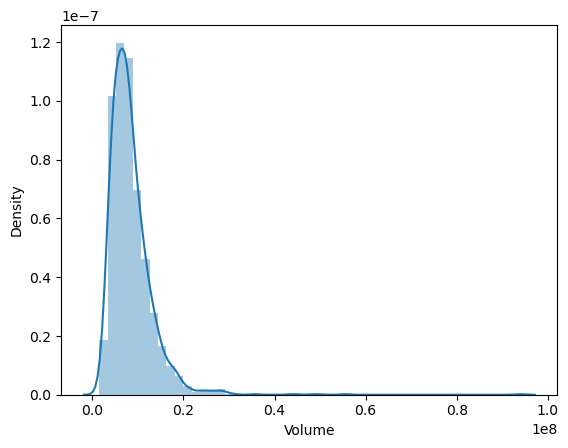

In [18]:
generateHist(df_gold,50)

# Generate box plots

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


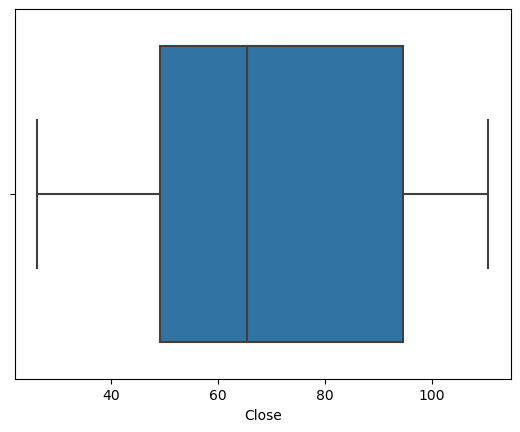

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


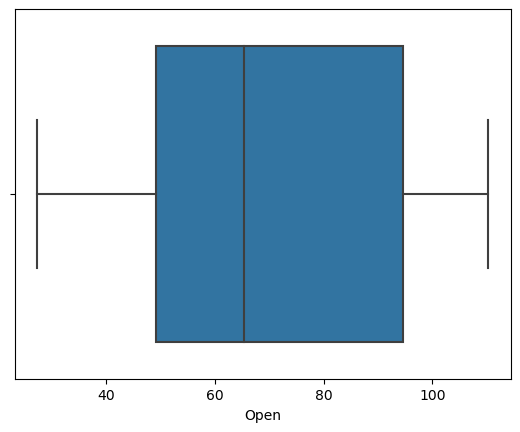

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


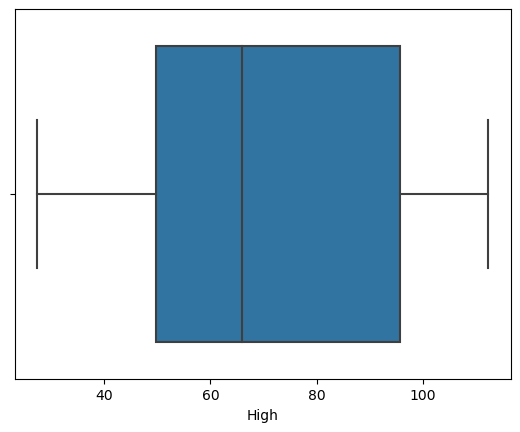

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


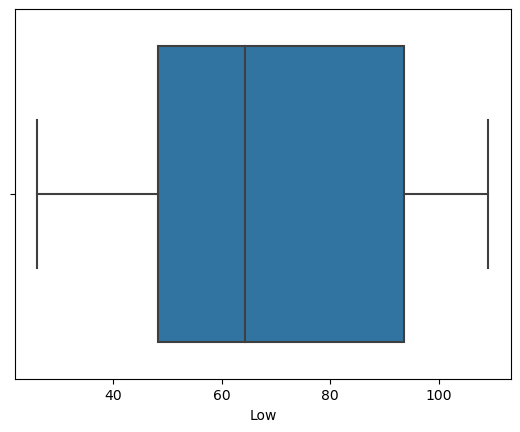

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


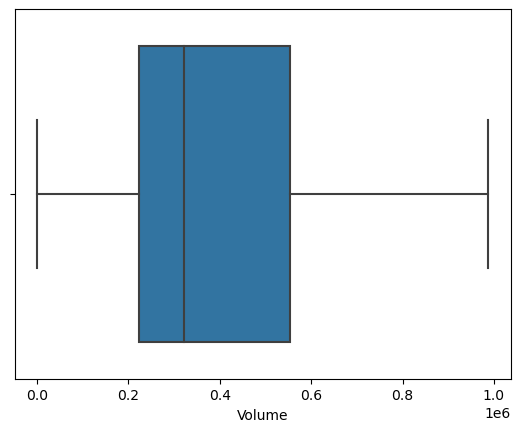

In [19]:
generateBox(df_oil)

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


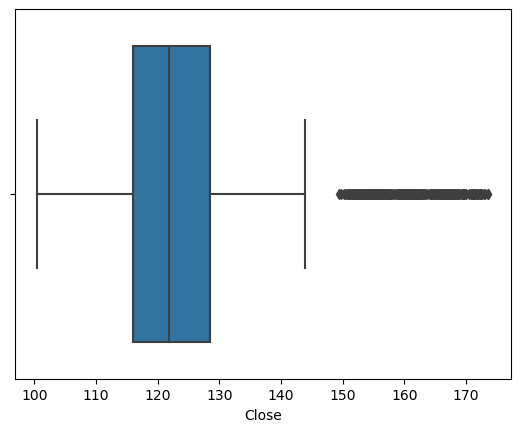

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


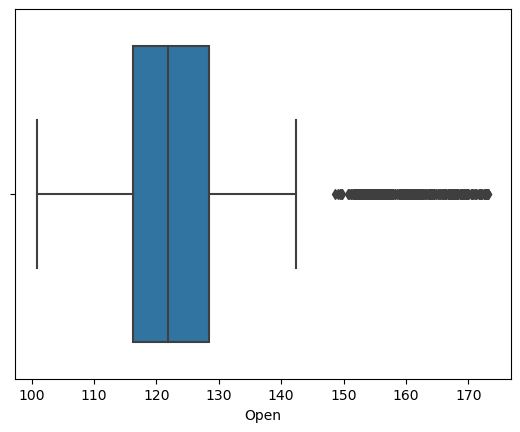

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


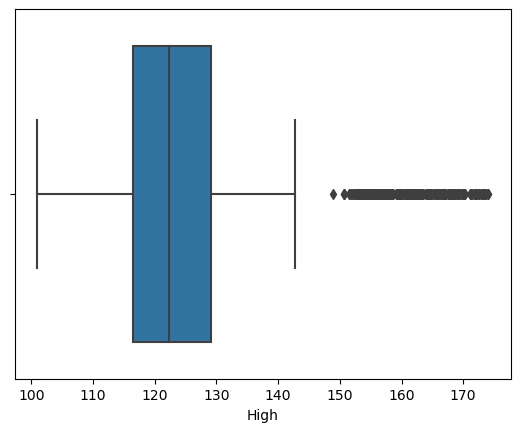

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


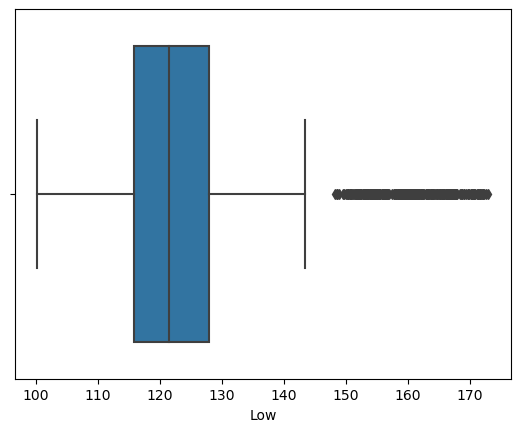

C:\Users\liamh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


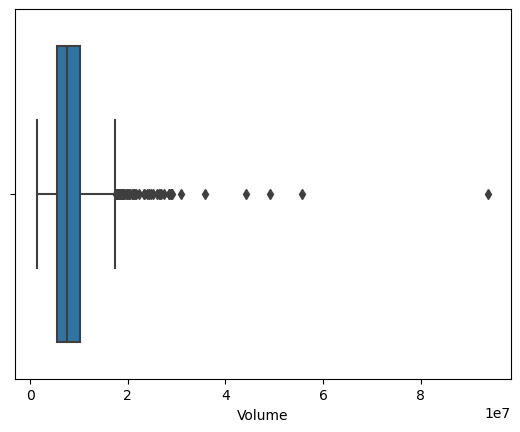

In [20]:
generateBox(df_gold)

# Handle outliers
Lets first show outliers on A line plot, And identify wether it's a systemic change at that point in time or a random blip

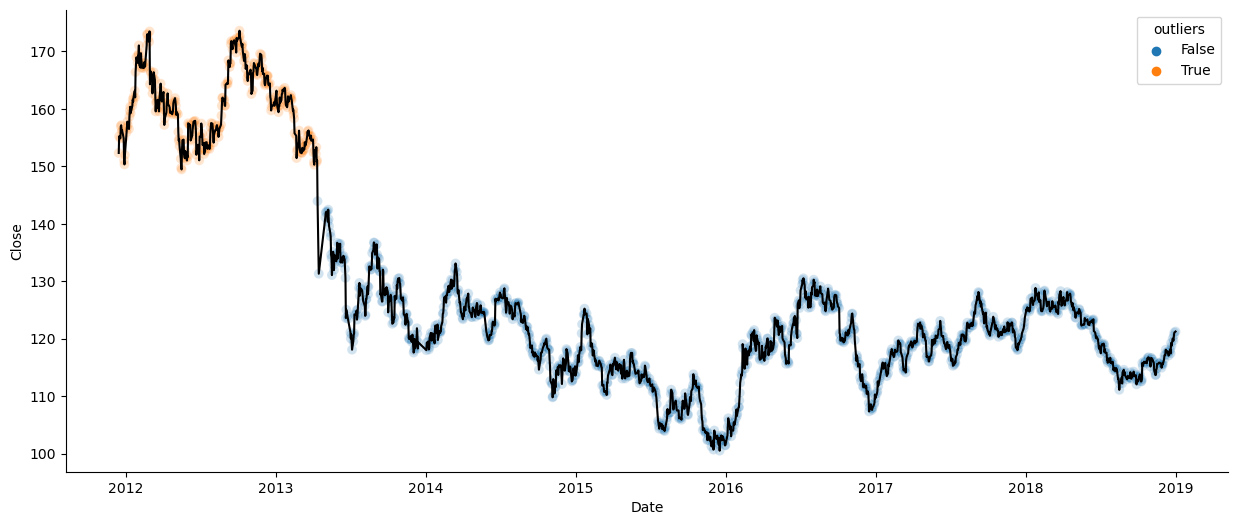

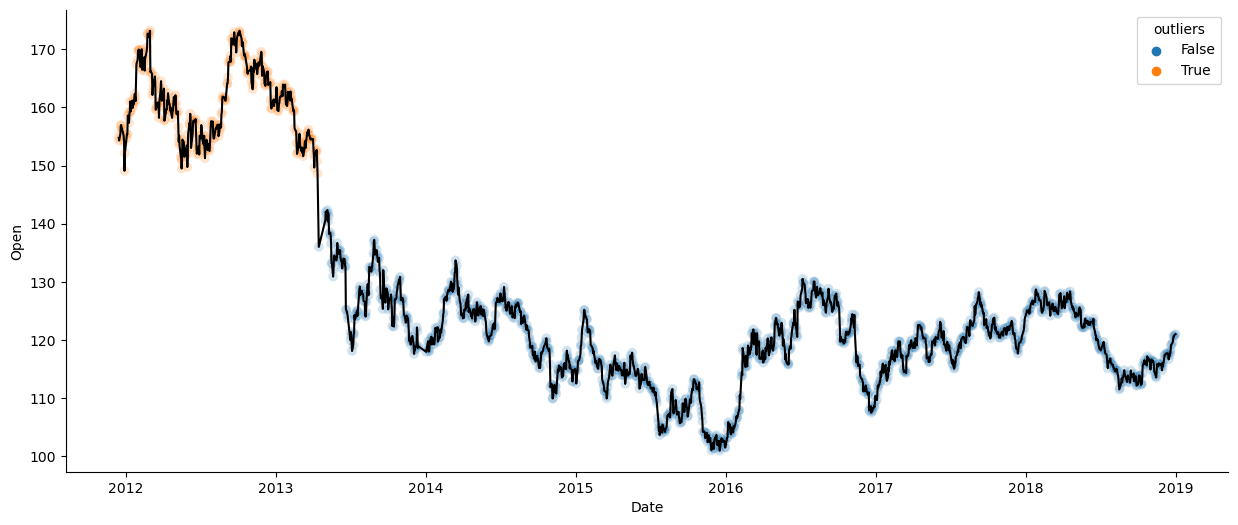

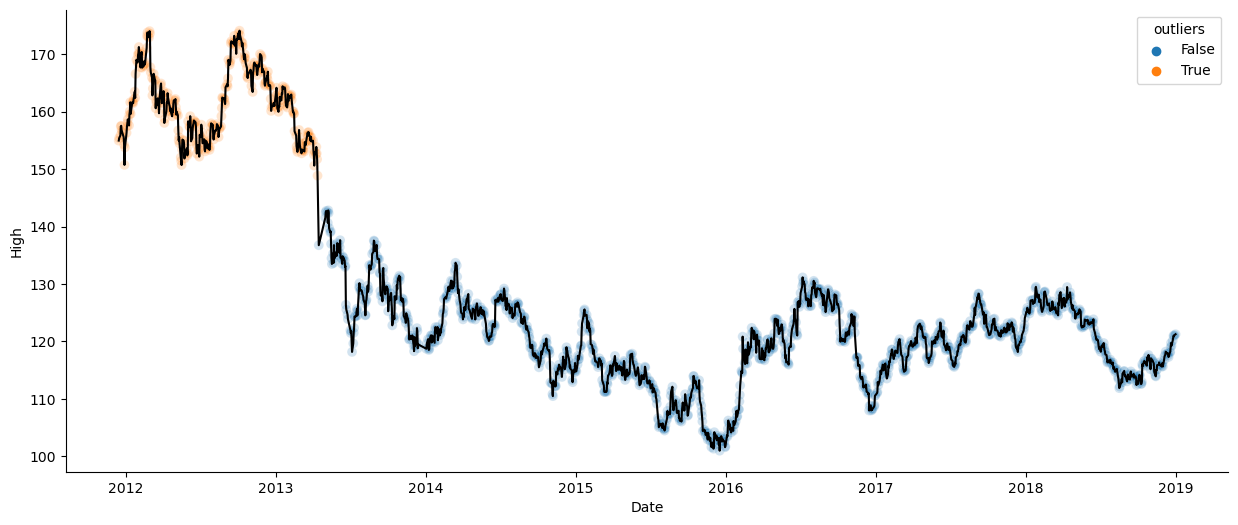

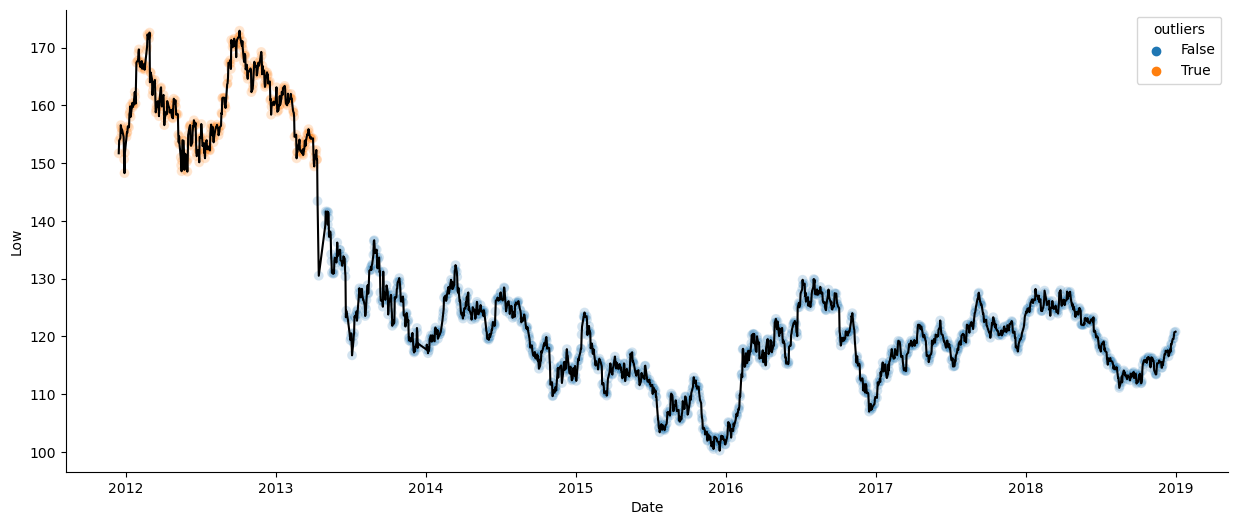

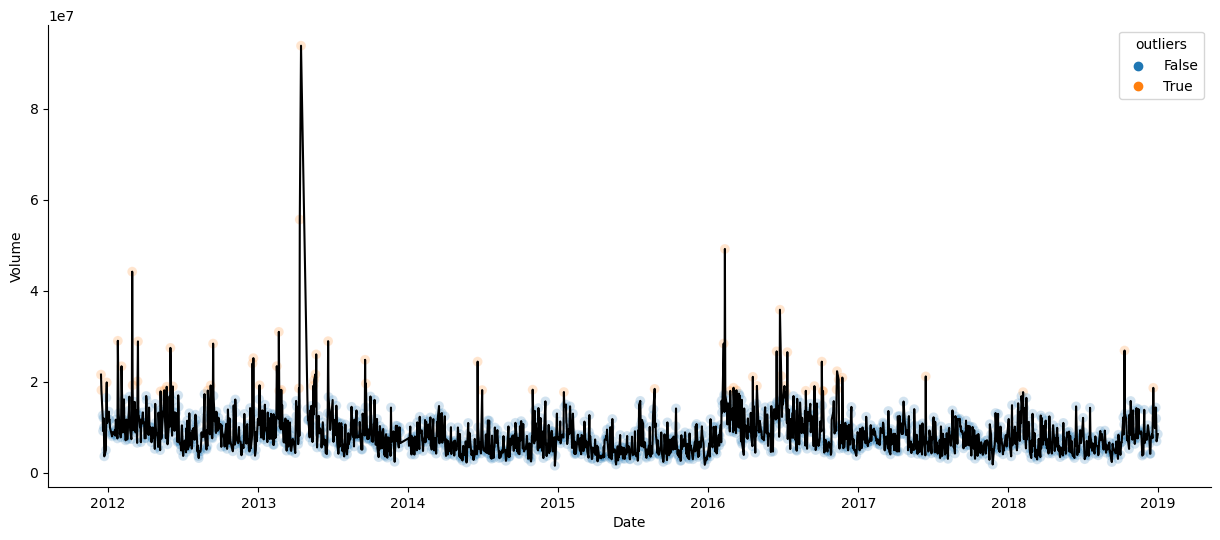

In [21]:
for col in df_gold:
    if col != "Date":
        identifyOutlierGraph(df_gold,col)

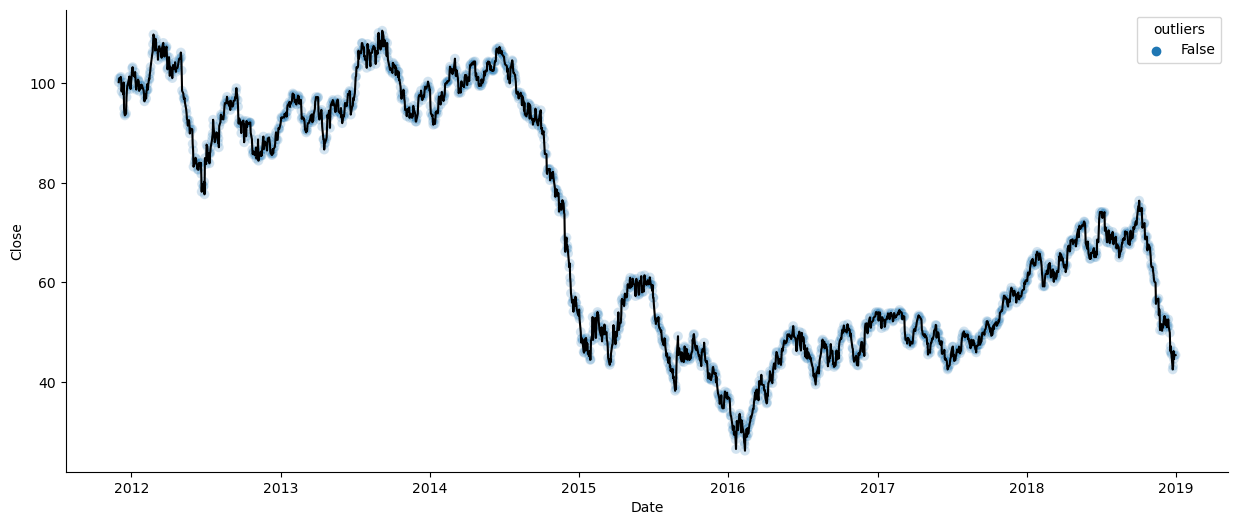

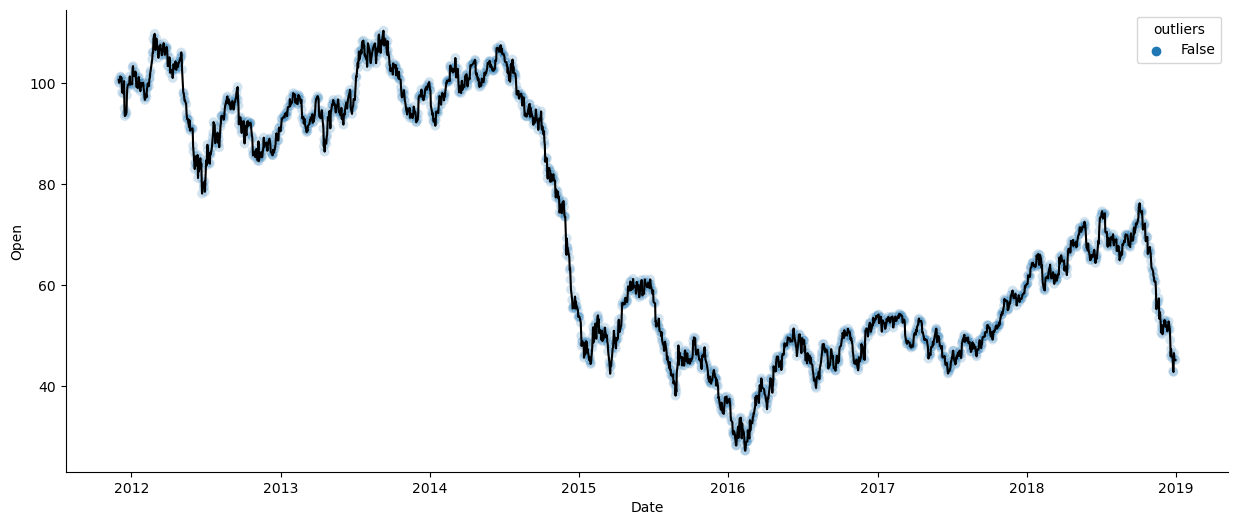

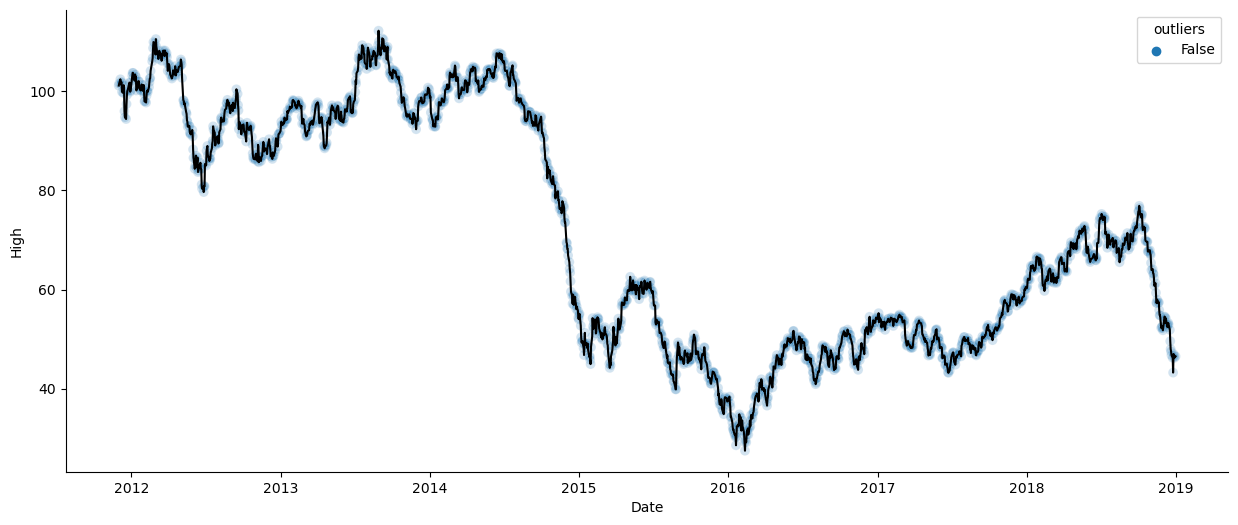

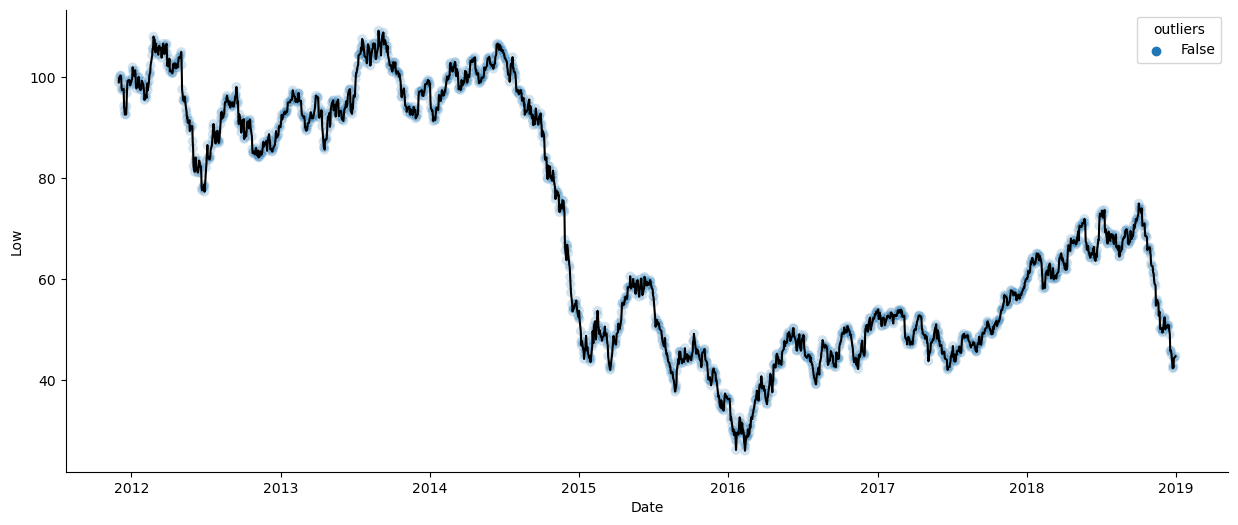

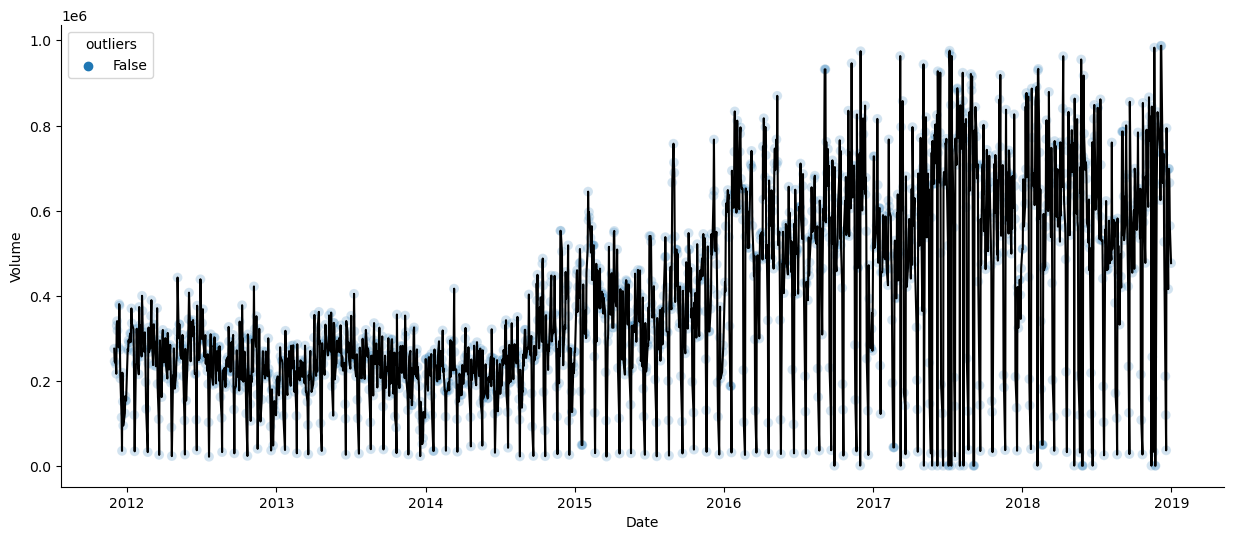

In [22]:
for col in df_oil:
    if col != "Date":
        identifyOutlierGraph(df_oil,col)

# Generate candlestick plots

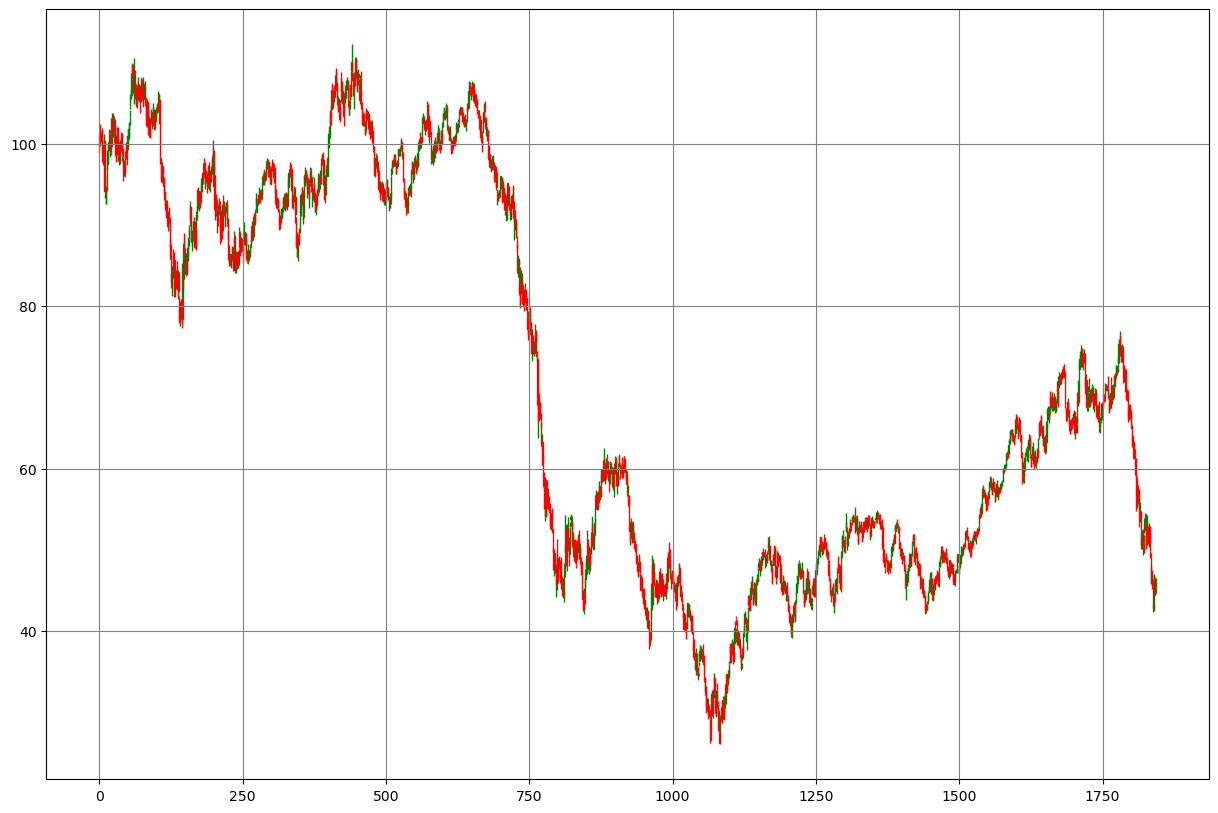

In [35]:
candleStick(df_oil)

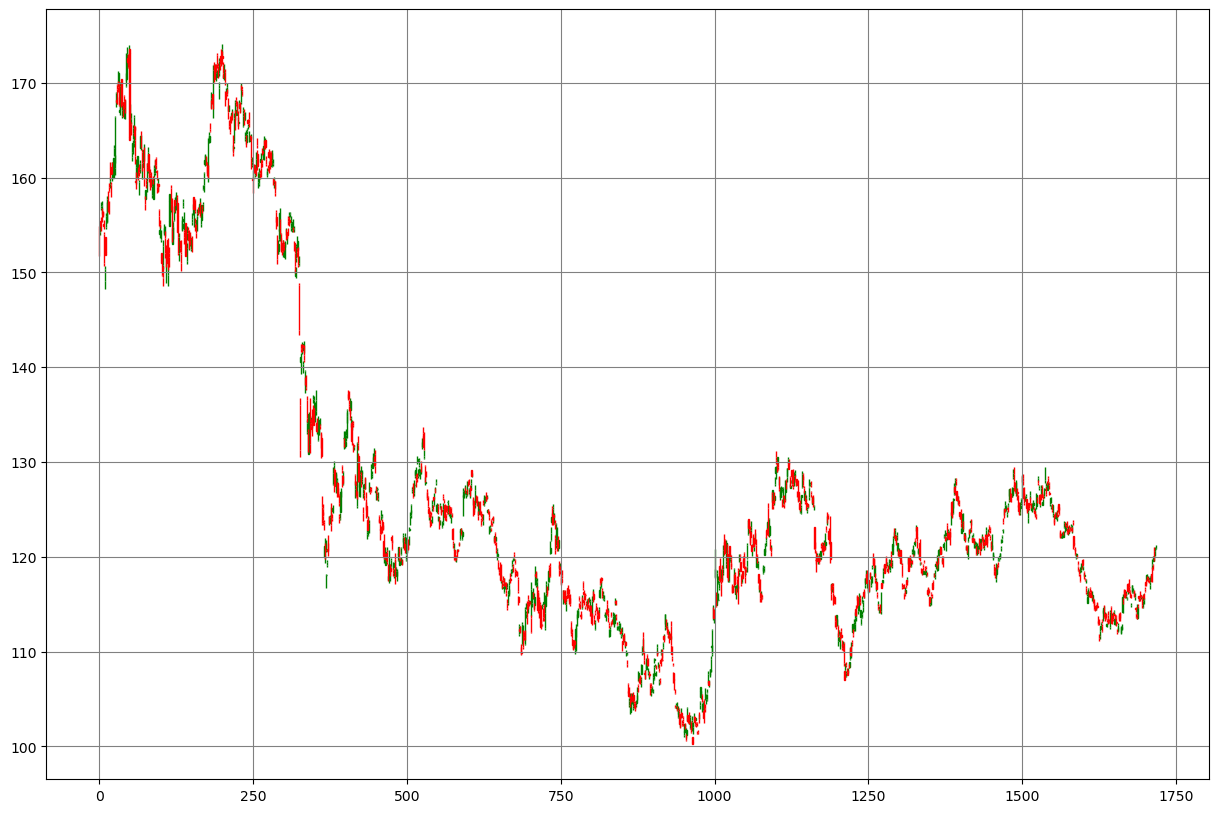

In [36]:
candleStick(df_gold)

# December 2015 

In [25]:
start_date = "2015-12-01"
end_date = "2015-12-31"

mask = (df_oil["Date"] > start_date) & (df_oil["Date"] < end_date)
df_oilDec = df_oil.loc[mask]

mask = (df_gold["Date"] > start_date) & (df_gold["Date"] < end_date)
df_goldDec = df_gold.loc[mask]

C:\Users\liamh\AppData\Local\Temp\ipykernel_18036\254373140.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['indices'] = range(len(df))


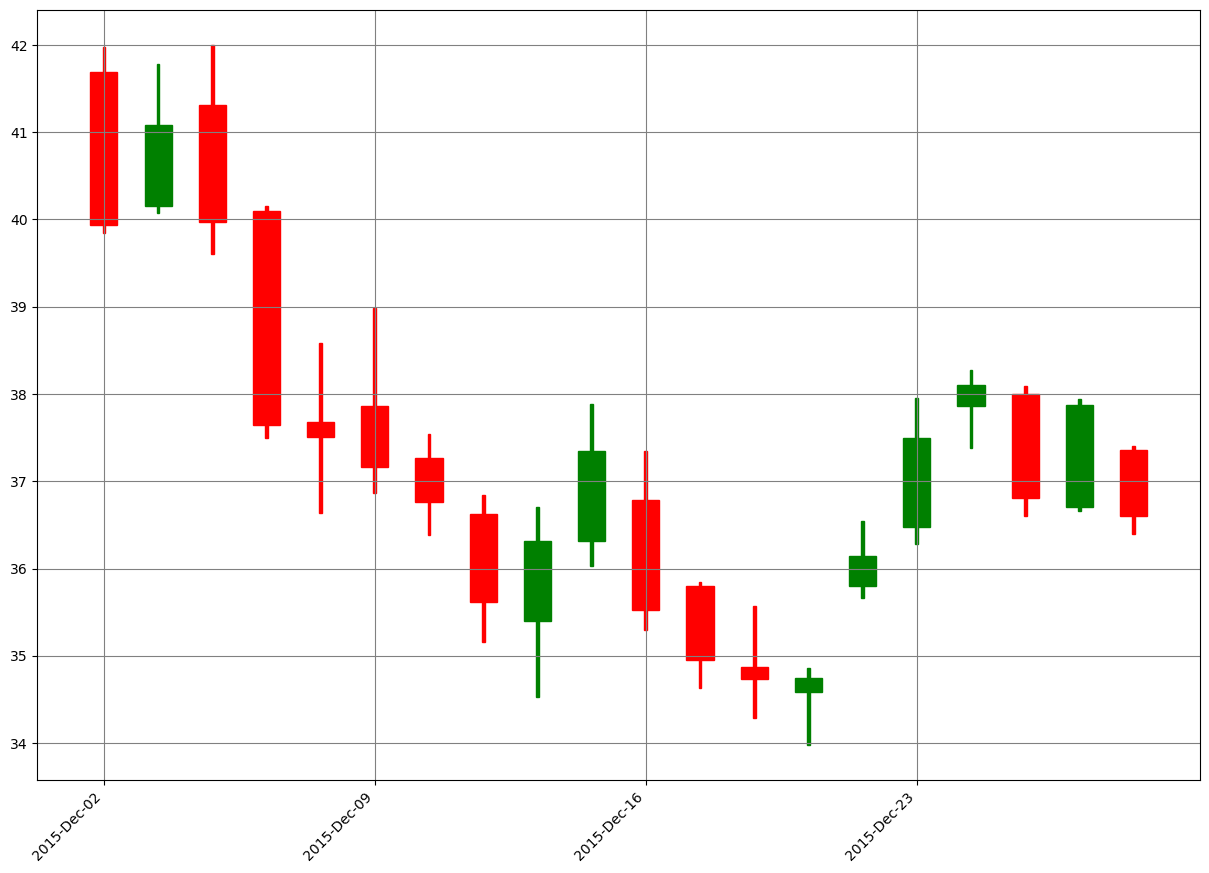

In [41]:
candleStick(df_oilDec,fixDates = True)

C:\Users\liamh\AppData\Local\Temp\ipykernel_18036\254373140.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['indices'] = range(len(df))


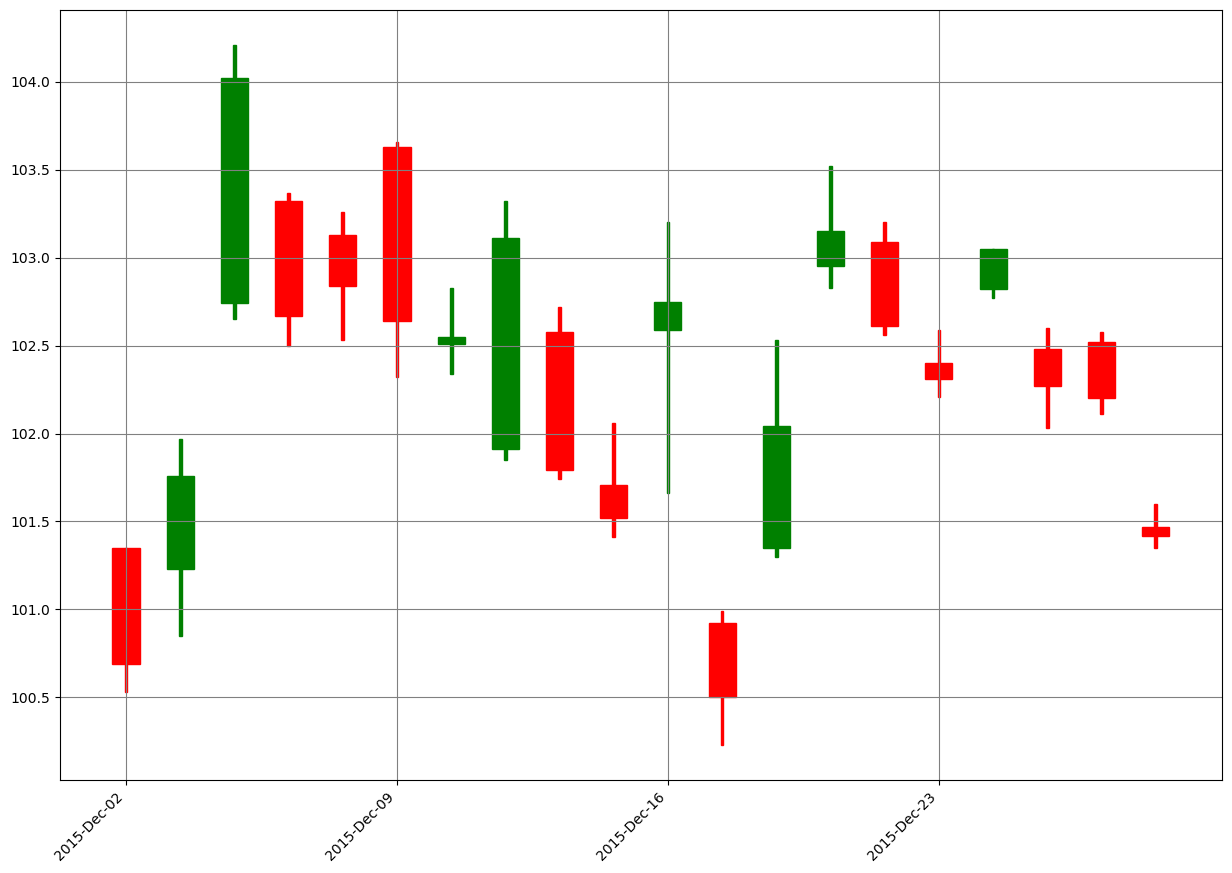

In [42]:
candleStick(df_goldDec,fixDates = True)

In [28]:
df_oil["Date"]

0      2011-12-01
1      2011-12-02
2      2011-12-05
3      2011-12-06
4      2011-12-07
          ...    
1839   2018-12-25
1840   2018-12-26
1841   2018-12-27
1842   2018-12-28
1843   2018-12-31
Name: Date, Length: 1844, dtype: datetime64[ns]

# June 2016

In [29]:
start_date = "2016-6-01"
end_date = "2016-6-30"

mask = (df_oil["Date"] > start_date) & (df_oil["Date"] < end_date)
df_oilJun = df_oil.loc[mask]

mask = (df_gold["Date"] > start_date) & (df_gold["Date"] < end_date)
df_goldJun = df_gold.loc[mask]

C:\Users\liamh\AppData\Local\Temp\ipykernel_18036\2675892465.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['indices'] = range(len(df))


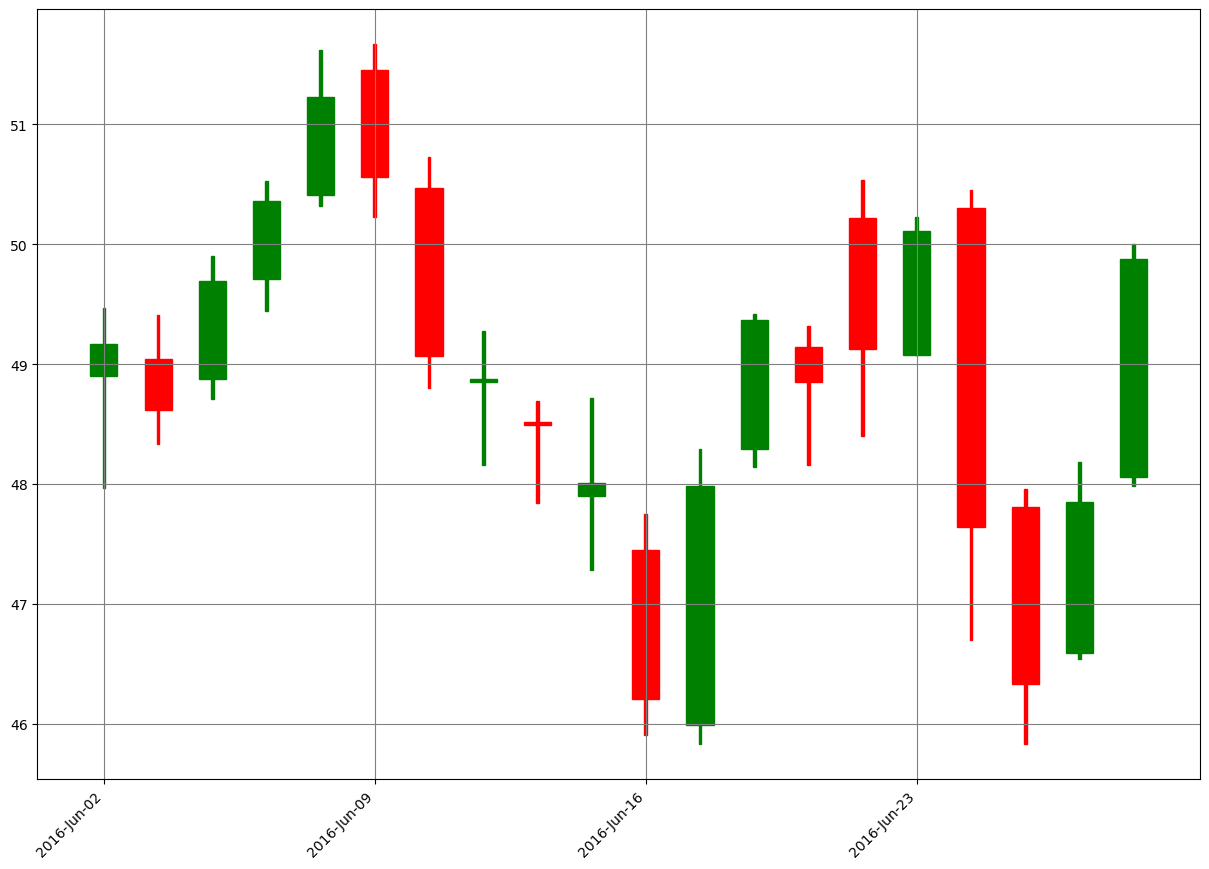

In [30]:
candleStick(df_oilJun, fixDates = True)

C:\Users\liamh\AppData\Local\Temp\ipykernel_18036\2675892465.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['indices'] = range(len(df))


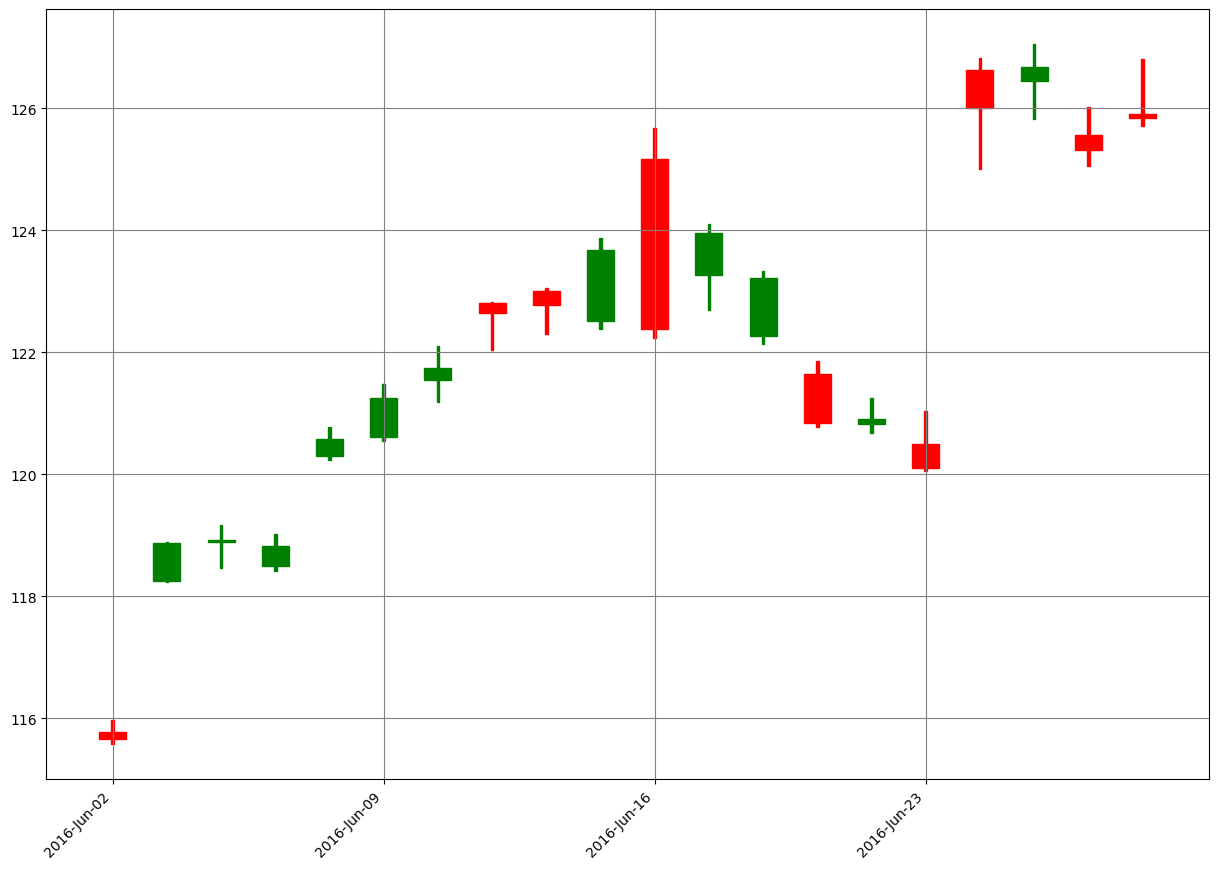

In [31]:
candleStick(df_goldJun, fixDates = True)

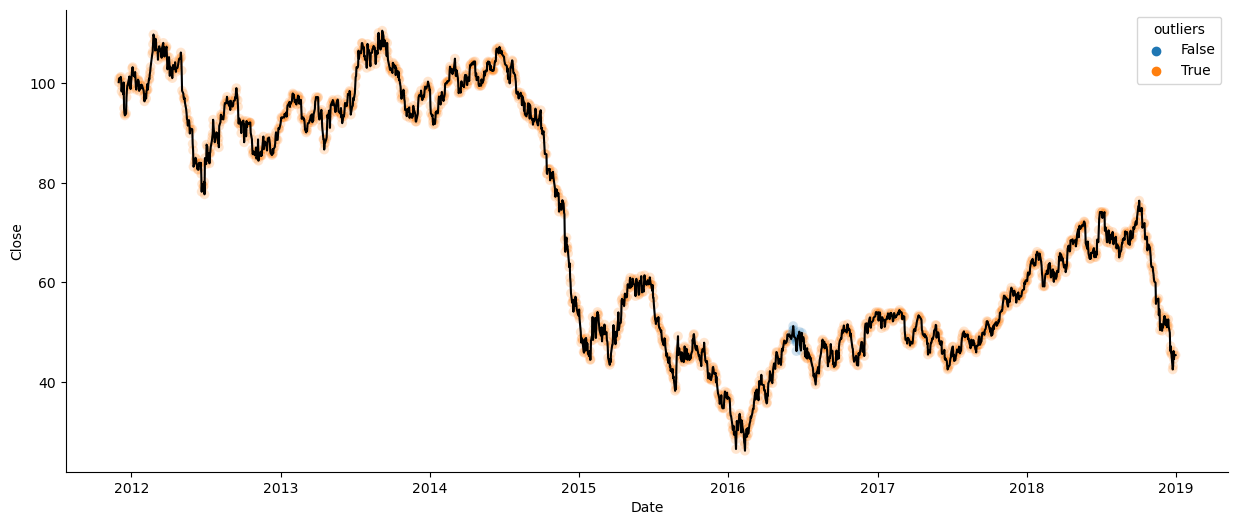

In [59]:
identifyDatesGraph(df_oil, start_date,end_date,"Close")

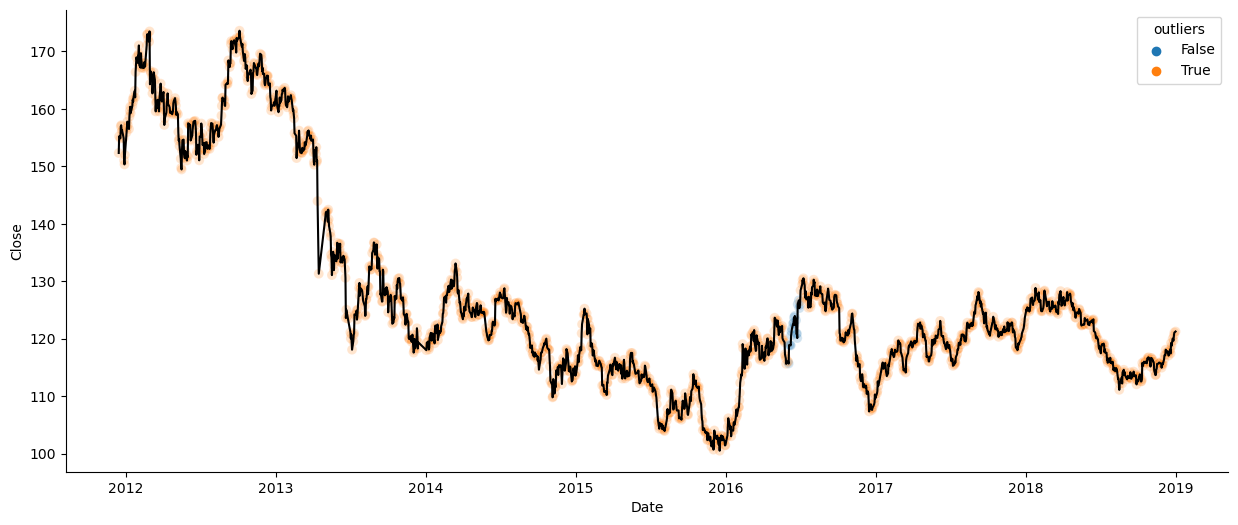

In [60]:
identifyDatesGraph(df_gold, start_date,end_date,"Close")

In [66]:
df_oil = df_oil[["Date","Close","Open","High","Low","Volume"]]
df_gold = df_gold[["Date","Close","Open","High","Low","Volume"]]
df_gold.to_csv("Fixed_Oil_Price.csv")
df_oil.to_csv("Fixed_Gold_Price.csv")